In [1]:
# import io
# import os
# import sys
# import glob
# from importlib import reload 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ska


# Simple tests

In [2]:
T = 5778
BB = ska.Spectrum(5778)
BB.Flux = BB.flux / BB.flux.max()

In [3]:
sun = ska.Spectrum('sun.csv')
ceres = ska.Spectrum('ceres.csv')
vesta = ska.Spectrum('vesta.csv')

sun.flux = sun.flux / sun.flux.max()

vtype = ska.Spectrum('V')

In [30]:
import classy

# Define dummy data
wave = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
refl = [0.85, 0.94, 1.01, 1.05, 1.04, 1.02, 1.04, 1.07, 1.1]
spec = classy.Spectrum(wave=wave, refl=refl)

test = ska.Spectrum( np.array( [spec.wave, spec.refl]).T )

In [31]:
V = ska.Filter('Generic/Johnson.V')
J = ska.Filter('2MASS/2MASS.J')
H = ska.Filter('Paranal/VISTA.H')
K = ska.Filter('Paranal/VISTA.Ks')

(0.1, 3.0)

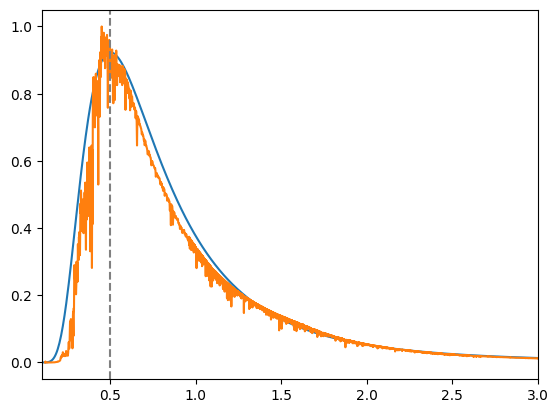

In [32]:
fig, ax = plt.subplots()

ax.plot( BB.wave, BB.flux*0.35e-8, label='Black Body')
ax.plot( sun.wave, sun.flux, label='Black Body')

ax.axvline( 2898/T, linestyle='--', color='grey')
ax.set_xlim(0.1, 3)
# ax.plot( ww, ff, label='Black Body')

(0.1, 3.0)

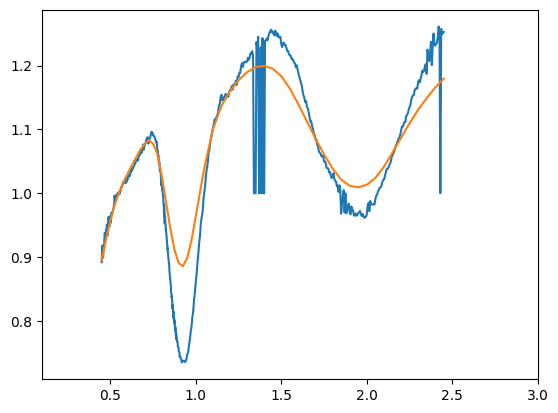

In [33]:
fig, ax = plt.subplots()

ax.plot( vesta.wave, vesta.flux, label='Vesta')
ax.plot( vtype.wave, np.log10(vtype.flux)+1, label='V type')

ax.set_xlim(0.1, 3)
# ax.plot( ww, ff, label='Black Body')

(0.1, 2.5)

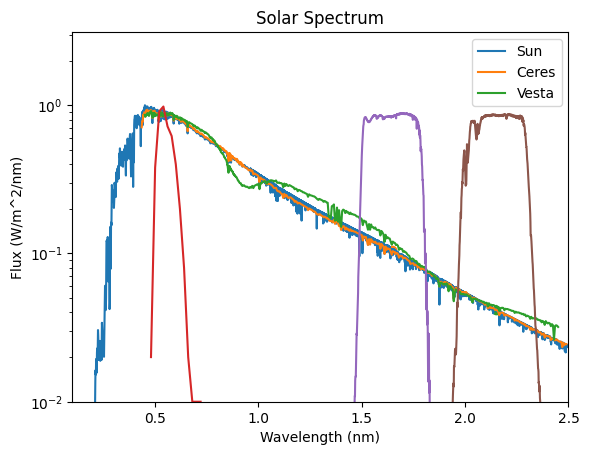

In [34]:
fig, ax = plt.subplots()


ax.plot(sun.wave, sun.flux, label='Sun')



ceres_spec = ceres.reflectance_to_flux(sun)
# ceres_spec.reflectance_to_flux(sun)
ax.plot( ceres_spec.wave, ceres_spec.flux, label='Ceres')

vesta_spec = vesta.reflectance_to_flux(sun)
# vesta_spec = vesta.copy()
# vesta_spec.reflectance_to_flux(sun)
ax.plot( vesta_spec.wave, vesta_spec.flux, label='Vesta')

for filt in [V, H, K]:
    refl = filt.compute_flux(sun)
    cent = filt.central_wavelength

    ax.plot( filt.wave, filt.trans)#, label=filt.id)
    ax.scatter(cent, refl)#, label=filt.id)


ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(bottom=1e-2)
ax.set_xlim(0.1,2.5)

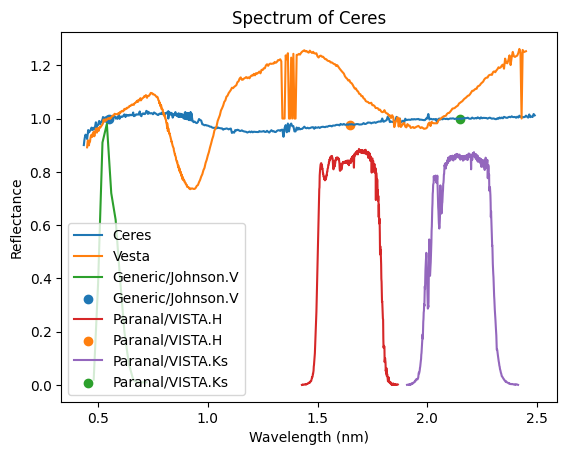

In [35]:
fig, ax = plt.subplots()


ax.plot(ceres.wave, ceres.flux, label='Ceres')
ax.plot(vesta.wave, vesta.flux, label='Vesta')

for filt in [V, H, K]:
    refl = filt.compute_flux(ceres)
    cent = filt.central_wavelength

    ax.plot( filt.wave, filt.trans, label=filt.id)
    ax.scatter(cent, refl, label=filt.id)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.set_title('Spectrum of Ceres')
ax.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [37]:
print( ceres.compute_color(V,J) )
print( ceres.compute_color('Generic/Johnson.V', '2MASS/2MASS.J') )

2.606829067926779
2.606829067926779


In [ ]:
fig, ax = plt.subplots()


ax.plot(sun.wave, sun.flux, label='Sun')

ax.plot( H.wave, H.trans, label='H')
ax.plot( K.wave, K.trans, label='H')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
H.compute_flux( sun ),  V.compute_flux( sun )

In [ ]:
sun.compute_color( V, H, phot_sys='AB')

In [ ]:
sun.compute_color( V, H, phot_sys='Vega')